In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [30]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X)

50

In [32]:
train_data_split = int(0.8 * len(X))

X_train, y_train = X[:train_data_split],  y[:train_data_split]
X_test, y_test = X[train_data_split:], y[train_data_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10, 7))

    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training_data')
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Testing_data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'predictions')


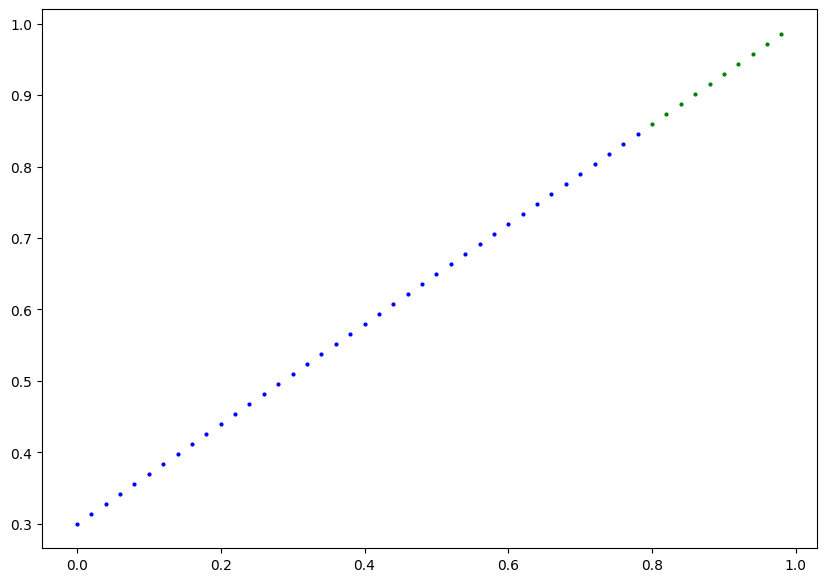

In [7]:
plot_predictions()

In [24]:
class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()    
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype = torch.float),
                                                requires_grad= True)
        
        self.bias = nn.Parameter(torch.randn(1,
                                                dtype = torch.float),
                                                requires_grad= True)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
            return self.weights*X + self.bias

In [25]:
torch.manual_seed(42)

model_0 = Linear_Regression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [37]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds[0], y_preds.shape, X_test.shape

(tensor([0.1288]), torch.Size([50, 1]), torch.Size([10, 1]))

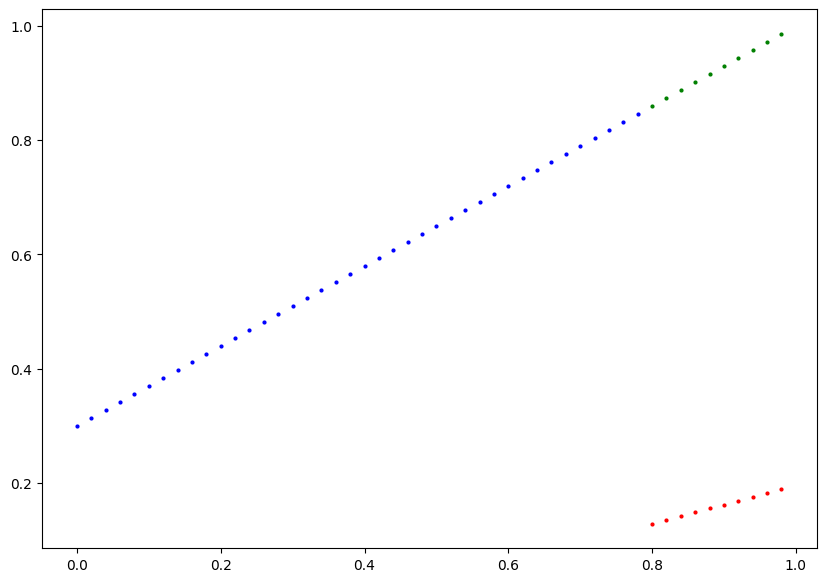

In [38]:
plot_predictions(predictions = y_preds[:10])

In [44]:
Loss_fn = torch.nn.L1Loss()
optimiser = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [64]:
torch.manual_seed(42)
epochs = 1

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = Loss_fn(y_pred[:40], y_train)
    print(f'Loss :{loss}')
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    model_0.eval()


Loss :0.0025885067880153656


In [65]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [66]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

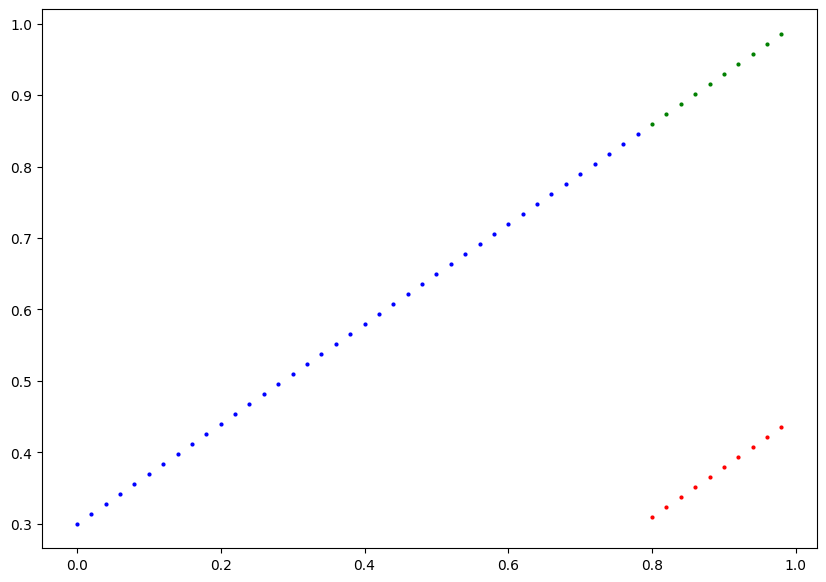

In [67]:
plot_predictions(predictions = y_preds_new[:10])